In [1]:
# nbi:hide_in
##########################
# Created on Mar 2020
# @author: juans
##########################

In [2]:
# nbi:hide_in
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

In [3]:
# nbi:hide_in
def sinusoid(fc, numCicles, fs):
    dur = 1 / fc * numCicles
    t = np.linspace(0, dur, int(dur * fs), endpoint=False)
    x = np.sin(2 * np.pi * fc * t)
    return t, x, dur
    

t1, x1, dur1 = sinusoid(441, 1, 44100)
t2, x2, dur2 = sinusoid(480, 1, 48000)
t1 *= 1000
t2 *= 1000
dur1 *= 1000
dur2 *= 1000

In [4]:
# nbi:hide_in
xOffsetSlider = widgets.FloatSlider(
    value=0,
    min=0,
    max=1,
    step=0.1,
    description='xOffset',
#     continuous_update=False,
    readout_format='.1f',
)

xZoomSlider = widgets.IntSlider(
    value=0,
    min=0,
    max=10,
    step=1,
    description='xZoom',
#     continuous_update=False,
    readout_format='d',
)

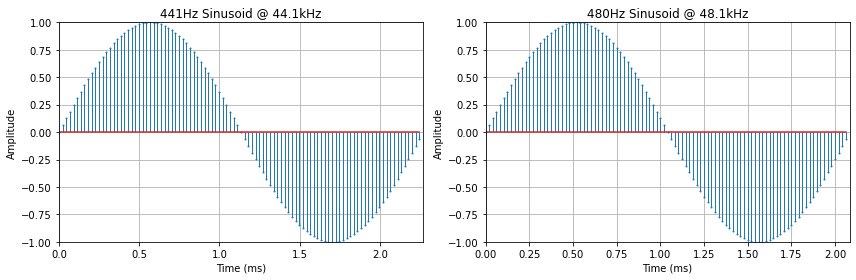

In [5]:
# nbi:hide_in
def plot(xOffset, xZoom):
    plt.figure(1, figsize=(12, 4))
    plt.subplot(121)
    ml, sl, bl = plt.stem(t1, x1, use_line_collection=True)
    plt.setp(sl, lw=1)
    plt.setp(ml, ms=1)
    plt.ylim([-1, 1])
    plt.xlim( xOffset * dur1 + np.array([0, dur1]) / (2.0**xZoom))
    plt.grid(True)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.title('441Hz Sinusoid @ 44.1kHz')

    plt.subplot(122)
    ml, sl, bl = plt.stem(t2, x2, use_line_collection=True)
    plt.setp(sl, lw=1)
    plt.setp(ml, ms=1)
    plt.ylim([-1, 1])
    plt.xlim( xOffset * dur2 + np.array([0, dur2]) / (2.0**xZoom))
    plt.grid(True)
    plt.tight_layout()
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.title('480Hz Sinusoid @ 48kHz')
    plt.tight_layout()
    
widgets.interactive(plot, xOffset=xOffsetSlider, xZoom=xZoomSlider)